In [2]:
import numpy as np
import matplotlib.pyplot as plt
from clustering.kmesar import *

In [3]:
points = np.array([[1, 2], [3, 3], [0, 1]])
print(np.mean(points, axis=0))

[1.33333333 2.        ]


[0. 0. 1. 1. 0. 0. 1. 2. 2. 2. 2. 2.]
1.019803902718557
0.8


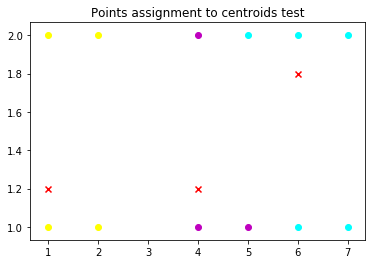

In [4]:
centroids = np.array([
    [1, 1.2],
    [4, 1.2],
    [6, 1.8]
])
points = np.array([[1, 1], [2, 1], [4, 1], [5, 1], [1, 2], [2, 2], [4, 2], [5, 2],
                   [6, 1], [7, 1], [6, 2], [7, 2]])

labels = assign_points_to_centroids(points, centroids)
print(labels)

colors = ['yellow', 'm', 'cyan', 'brown']
for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('Points assignment to centroids test')
plt.show()

print(euclidean_distance(np.array([4, 2]), np.array([5, 1.8])))
print(euclidean_distance(np.array([4, 2]), np.array([4, 1.2])))

[[1.5        1.5       ]
 [4.33333333 1.33333333]
 [6.2        1.6       ]]


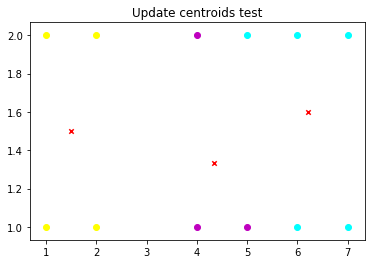

In [5]:

for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

new_centroids = update_centroids(points, centroids, labels)
print(new_centroids)

plt.title('Update centroids test')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=20, marker='x')

In [6]:
sse = sum_of_squared_error(points, new_centroids, labels)
print(f'SSE = {sse}')

SSE = 7.333333333333334


In [7]:
sse_test_0 = euclidean_distance(points[0], new_centroids[0])**2 + \
           euclidean_distance(points[1], new_centroids[0])**2 + \
           euclidean_distance(points[4], new_centroids[0])**2 + \
           euclidean_distance(points[5], new_centroids[0])**2
print(f'SSE_test_0 = {sse_test_0}')
print(new_centroids[0])
print(points[0])
print(points[1])
print(points[4])
print(points[5])

print(f'SSE_test = {sse_test_0 * 3}')

SSE_test_0 = 2.0000000000000004
[1.5 1.5]
[1 1]
[2 1]
[1 2]
[2 2]
SSE_test = 6.000000000000002


In [8]:
p = np.sum(np.power(points[0] - new_centroids[0], 2))
print(p)

p2 = euclidean_distance(points[0], new_centroids[0]) ** 2
print(p2)

0.5
0.5000000000000001


In [9]:
lower_bound = np.array([-1, -5, 0, 0.5, 0.9])
upper_bound = np.array([1, 1.5, 2, 0.6, 3])
x = np.random.random_sample((5,))
print(x)

x_lower_upper = lower_bound + x * (upper_bound - lower_bound)
print(x_lower_upper)

[0.65829259 0.8522327  0.28587753 0.50680235 0.7681167 ]
[0.31658519 0.53951255 0.57175505 0.55068024 2.51304506]


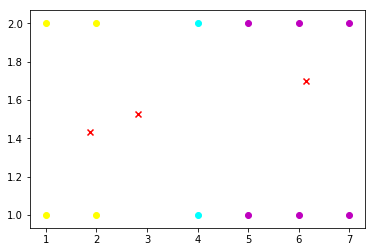

In [10]:
# print(points)
mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

init_centroids = initialize_centroids_random(points, 3, lower_bound=mins, upper_bound=maxs)
init_labels = assign_points_to_centroids(points, init_centroids)
k_labels = init_centroids.shape[0]

for k in range(k_labels):
    points_k = extract_labeled_points(points, init_labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='red', marker='x')

In [11]:
print(init_labels)

[0. 0. 2. 1. 0. 0. 2. 1. 1. 1. 1. 1.]


In [12]:
a = np.array([1, 2])
a = np.append(a, 3)
print(a)

[1 2 3]


In [14]:
mean_centroids = np.array([
    [1, 2], [3, 1], [4, 4]
])
annealed_centroids = np.array([
    [1.5, 2.5], [3, 1], [2, 2]
])

history = np.concatenate([mean_centroids, annealed_centroids], axis=1)
print(history)

indices = np.array([0, 2])
print(mean_centroids[indices])

[[1.  2.  1.5 2.5]
 [3.  1.  3.  1. ]
 [4.  4.  2.  2. ]]
[[1 2]
 [4 4]]


In [15]:
l = mean_centroids.shape[0]
n = mean_centroids.shape[1]
concat = np.zeros((l, 2, n))
concat[:, 0, :] = mean_centroids
concat[:, 1, :] = annealed_centroids

print(concat)

[[[1.  2. ]
  [1.5 2.5]]

 [[3.  1. ]
  [3.  1. ]]

 [[4.  4. ]
  [2.  2. ]]]
